In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import urllib.request

import os
import zipfile
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
#from keras.optimizers import Adam

In [3]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

**We need to reshape our X and y data**

* For X, we need to add a 4th dimension using np.expand_dims
* For y, we need to factorize our labels using to_categorical

In [8]:
X_train_reshaped = np.expand_dims(X_train, axis=3)
X_test_reshaped = np.expand_dims(X_test, axis=3)
y_train_cats = to_categorical(y_train)
y_test_cats = to_categorical(y_test)

In [9]:
X_train_reshaped.shape

(60000, 28, 28, 1)

**Now we can build the model**

* We can define the number of kernels
* The number of strides
* The activation function to be used

In [10]:
model = Sequential([
    Conv2D(filters=40,             # aka neurons/kernels
           kernel_size=(3,3),      # (3,3) kernel has 9+1 parameters
           strides=(2,2),          # bigger > smaller output [default:(1,1) and use MaxPool aftwerwards]
           activation='relu',      #ReLu great first choice. ELU for optimization
           input_shape=(28,28,1)), #have to specify input shape in first layer <- shape of X
    Conv2D(filters=20, kernel_size=(3,3), strides=(2,2), activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Flatten(),
    Dense(10, activation='softmax')])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 13, 40)        400       
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 20)          7220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 20)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 80)                0         
                                                                 
 dense (Dense)               (None, 10)                810       
                                                                 
Total params: 8,430
Trainable params: 8,430
Non-trainable params: 0
______________________________________________________

In [18]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
# Early stopping:
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss', #the thing we are monitoring
    min_delta=0.0005, #the minimum change in the quantity that we want for the model to train for another epoch
    patience=3, #number of epochs with no improvement needed for the model to stop
    verbose=1, #0 is silent, 1 means a message is displayed when something happens
    mode='auto'  
)

In [22]:

history = model.fit(X_train_reshaped,y_train_cats, epochs=30, batch_size=50, callbacks=[early_stop], validation_split=0.2)


Epoch 1/30
960/960 [==============================] - 11s 11ms/step - loss: 0.1154 - accuracy: 0.9657 - val_loss: 0.1454 - val_accuracy: 0.9592
Epoch 2/30
960/960 [==============================] - 10s 11ms/step - loss: 0.1058 - accuracy: 0.9680 - val_loss: 0.1544 - val_accuracy: 0.9587
Epoch 3/30
960/960 [==============================] - 10s 11ms/step - loss: 0.1042 - accuracy: 0.9684 - val_loss: 0.1496 - val_accuracy: 0.9614
Epoch 4/30
960/960 [==============================] - 10s 11ms/step - loss: 0.1055 - accuracy: 0.9684 - val_loss: 0.1564 - val_accuracy: 0.9582
Epoch 4: early stopping


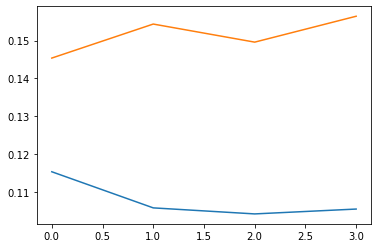

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

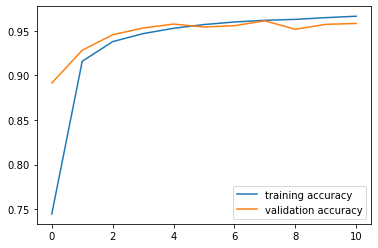

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training accuracy', 'validation accuracy'])

In [14]:
# prediction on new data points
print(model.predict(X_test_reshaped[:10]))

[[9.8490695e-11 3.2020218e-08 4.5842721e-06 5.1787294e-09 2.0570960e-12
  5.1207850e-13 2.0292526e-16 9.9999535e-01 5.8462429e-10 5.4291512e-08]
 [5.0524050e-05 7.2530533e-08 9.9962640e-01 5.4051861e-07 1.5350702e-12
  1.9649733e-12 3.9052250e-09 3.1832470e-09 3.2155387e-04 9.5935513e-07]
 [8.0981948e-08 9.9998605e-01 1.6490066e-09 2.7083600e-12 1.1609827e-05
  3.1174435e-11 7.7271753e-09 2.3175185e-06 2.9036160e-08 1.0897147e-10]
 [9.9992347e-01 2.4537063e-09 8.1807917e-07 2.7297184e-10 1.1056496e-08
  2.8805403e-10 1.2724450e-06 1.1925722e-08 7.4376476e-05 2.8063665e-08]
 [9.3794816e-12 2.7617754e-12 2.5147262e-13 4.6463873e-17 1.0000000e+00
  9.4387710e-18 1.1310857e-10 1.5132611e-14 1.9298557e-15 8.6195322e-12]
 [3.1463271e-06 9.9982220e-01 5.6218698e-07 9.9514112e-11 4.4482582e-05
  1.1963378e-10 3.1793444e-08 1.2442918e-04 3.1106456e-06 2.0420514e-06]
 [1.4160805e-11 4.0155240e-11 3.2081501e-12 2.8485603e-14 9.9999809e-01
  7.4167394e-11 5.8738699e-08 3.1286536e-11 1.3508701e-08 